# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: Hee Su Chang

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday September 15th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Problem 1 
***

An owner of a taxi company wants to estimate his fleet's average fuel economy over the next year in order to estimate the company's future fuel costs.  His fleet of taxis is made up of 100 Crown Victorias, 50 Toyota Priuses, and 50 Ford Escapes.  The owner randomly selects 12 vehicles from his vehicle registration rolls and tracks their fuel usage in miles per gallon over the next week.  So as to get a proper estimate, he intentionally selects 6 Crown Vics, 3 Priuses, and 3 Escapes to track. 

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

Population: Fleet of taxis (200 taxis) 

Sample Frame: Vehicle registration rolls

Sample: 6 Crown Vics, 3 Priuses, 3 Escapes 

Type of Sample: Stratified Sample (Random)

Quantity of Interest: 12 Vehicles 


###### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
3.0 \quad 
3.2 \quad
4.2 \quad
5.0
$$

with sample mean $4$ and sample median $4.2$. 

**Part A**: We replace the element $3.2$ by some real number $y$. What happens with the sample mean and the sample median of this new dataset as $y \rightarrow \infty$?


The sample mean also goes to $\infty$

The sample median becomes 4.6


**Part B**: We replace a number of elements by some real number $y$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $y \rightarrow \infty$?

3

**Part C**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $y$, so that the sample mean of the new dataset goes to infinity as $y \rightarrow \infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

To make the sample mean of the new dataset go to infinity, we only need to replace 1 element by some real number y where y  $y \rightarrow \infty$ since any number of finite numbers added to $\infty$ will be $\infty$. $\infty$ divided by any finite number (such as the data set size n) is also still $\infty$.

To make the sample median of the new dataset go to infinty, we need to replace at least n/2 elements with y where $y \rightarrow \infty$. This is the median is either the middle most element (n/2 position in even count ordered list of elements) or the mean of the two middle most elements (in odd count ordered list of elements).

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

We can rewrite the above according to the summation definition.

$$
\begin{align}
\bar{x}_n &= \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \\\\
&= \frac{1}{n-1}\sum_{k=1}^{n-1} x_k \\\\
&= \frac{1}{n-1}(x_1+x_2+ ⋅⋅⋅ +x_n-1) + \frac{x_n-\frac{1}{n-1}(x_1+x_2+ ⋅⋅⋅ +x_n-1)}{n} \\\\
&= \frac{1}{n}\{\frac{n}{n-1}(x_1+x_2+ ⋅⋅⋅ +x_n-1) + x_n - \frac{1}{n-1}(x_1+x_2+ ⋅⋅⋅ +x_n-1)\} \\\\
&= \frac{1}{n}\{\frac{n-1}{n-1}(x_1+x_2+ ⋅⋅⋅ +x_n-1) + x_n\} \\\\
&= \frac{1}{n}\{(x_1+x_2+ ⋅⋅⋅ +x_n-1) + x_n\} \\\\
&= \frac{1}{n}\{(x_1+x_2+ ⋅⋅⋅ +x_n-1+x_n)\} \\\\
&= \frac{(x_1+x_2+ ⋅⋅⋅ +x_n-1+x_n)}{n} \\\\
&= \frac{1}{n}\sum_{k=1}^n x_k \\\\
&= \bar{x}_n
\end{align}
$$

Therefore, we can prove the relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations by showing that it can be simplified into an equation we know is true.

**Part B**: Show algebraically that the following relation holds between the variance of the first $n-1$ observations and the variance of all $n$ observations: 

$$
s^2_n = \frac{(n-2)}{(n-1)}s^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})^2}{n}
$$

**Part C**: It turns out that in some scenarios the variance calculation in **Part B** can suffer from numerical instability (that is, due to round-off errors and finite precision arithmetic, the algorithm can return garbage).  A better method is to update the sum of squares term incrementally and then divide by $n-1$ at the end.  Define the sum of squares with $n$ observations as $
M_n = \sum_{k=1}^n (x_k - \bar{x}_n)^2$. We can then compute the sample variance as $s_n^2 = M_n/(n-1)$.

Show algebraically that the following relation holds between the sum of squares with $n-1$ observations and the sum of squares with all $n$ observations: 

$$
M_n = M_{n-1} + (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n)
$$

$$
\begin{align}
M_n - M_{n-1} &= (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) \\
\sum_{k=1}^n (x_k - \bar{x}_n)^2 - \sum_{k=1}^{n-1} (x_k - \bar{x}_n)^2 &= (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) \\
\sum_{k=1}^n (x_k - \bar{x}_n)^2 - (x_k - \bar{x}_{n-1})^2 &= (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) - (x_n - \bar{x}_{n-1})^2 \\
\sum_{k=1}^n -2x_k(\bar{x}_n - \bar{x}_{n-1}) + (\bar{x}_n)^2 - (\bar{x}_{n-1})^2 &= (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) - (x_n - \bar{x}_{n-1})^2 \\
\sum_{k=1}^n -2x_k(\bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} - \bar{x}_{n-1}) + (\bar{x}_n)^2 - (\bar{x}_{n-1})^2 &= (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) - (x_n - \bar{x}_{n-1})^2 \\
\frac{-2x_n}{n}\sum_{k=1}^{n} x_k + \frac{2\bar{x}_{n-1}}{n}\sum_{k=1}^{n} x_k + \sum_{k=1}^{n} ((\bar{x}_n)^2 - (\bar{x}_{n-1})^2) &= (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) - (x_n - \bar{x}_{n-1})^2 \\
-2x_n\bar{x}_n + 2\bar{x}_n\bar{x}_{n-1} + n(\bar{x}_{n})^2 - n(\bar{x}_{n-1})^2 &= (x_n - \bar{x}_{n-1})(x_n - \bar{x}_n) - (x_n - \bar{x}_{n-1})^2 \\
-2x_n\bar{x}_n + 2\bar{x}_n\bar{x}_{n-1} + n(\bar{x}_{n})^2 - n(\bar{x}_{n-1})^2 &= (x_n)^2 - x_n\bar{x}_{n} - x_n\bar{x}_{n-1} + \bar{x}_n\bar{x}_{n-1} - (x_n)^2 + 2x_n\bar{x}_{n-1} - (\bar{x}_{n-1})^2 \\
-x_n\bar{x}_n + \bar{x}_n\bar{x}_{n-1} + n(\bar{x}_{n})^2 - n(\bar{x}_{n-1})^2 &= (x_n)^2 - x_n\bar{x}_{n-1}  - (x_n)^2 + 2x_n\bar{x}_{n-1} - (\bar{x}_{n-1})^2 \\
-x_n\bar{x}_n + \bar{x}_n\bar{x}_{n-1} + n\bar{x}_n\bar{x}_{n-1} + x_n\bar{x}_n - \bar{x}_n\bar{x}_{n-1} - n(\bar{x}_{n-1})^2 &= (x_n)^2 - x_n\bar{x}_{n-1}  - (x_n)^2 + 2x_n\bar{x}_{n-1} - (\bar{x}_{n-1})^2 \\
n\bar{x}_n\bar{x}_{n-1} - n(\bar{x}_{n-1})^2 &= x_n\bar{x}_{n-1} - (\bar{x}_{n-1})^2 \\
n(\bar{x}_{n-1})^2 + x_n\bar{x}_{n-1} - (\bar{x}_{n-1})^2 - n(\bar{x}_{n-1})^2 &= x_n\bar{x}_{n-1} - (\bar{x}_{n-1})^2 \\
0 &= 0
\end{align}
$$

**Informative But Not Required**: Write a Python function that implements the online variance computation in **Part C** and  requires only one pass over the data. 

### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in titanic_data.csv and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [4]:
local_path = 'https://raw.githubusercontent.com/chrisketelsen/csci3022/master/inclass-notebooks/data/clean_titanic_data.csv'
dfTitanic= pd.read_csv(local_path)
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Part A**: Explain in words what patterns you might see in the data if there were male chivalry in the final hours aboard the Titanic?  What patterns might you see if there were class warfare in the final hours?

If there were male chivalry in the final hours aboard the Titanic, we would observe patterns of a larger number of females and survived. 

If there were class warfare in the final hours, we would observe patterns of a larger proportion of upper class (1) survivors than lower class (3) survivors.

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [5]:
dfTitanic = dfTitanic.dropna(subset=["Survived", "Pclass", "Age", "Sex"]).copy()
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


**Part C**: Determine the fraction of survivors from each passenger class. 

In [6]:
class1survived = dfTitanic.loc[dfTitanic["Pclass"] == 1, "Survived"].sum()
class1total = (dfTitanic.loc[dfTitanic["Pclass"] == 1]).shape[0]
print("{} first class passengers out of {} survived : {}".format(class1survived, class1total, class1survived/class1total))
class2survived = dfTitanic.loc[dfTitanic["Pclass"] == 2, "Survived"].sum()
class2total = (dfTitanic.loc[dfTitanic["Pclass"] == 2]).shape[0]
print("{} second class passengers out of {} survived : {}".format(class2survived, class2total, class2survived/class2total))
class3survived = dfTitanic.loc[dfTitanic["Pclass"] == 3, "Survived"].sum()
class3total = (dfTitanic.loc[dfTitanic["Pclass"] == 3]).shape[0]
print("{} third class passengers out of {} survived : {}".format(class3survived, class3total, class3survived/class3total))

122 first class passengers out of 186 survived : 0.6559139784946236
83 second class passengers out of 173 survived : 0.4797687861271676
85 third class passengers out of 355 survived : 0.23943661971830985


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [7]:
male1 = dfTitanic.loc[(dfTitanic["Sex"]=="male") & (dfTitanic["Pclass"]==1)]
female1 = dfTitanic.loc[(dfTitanic["Sex"]=="female") & (dfTitanic["Pclass"]==1)]
male2 = dfTitanic.loc[(dfTitanic["Sex"]=="male") & (dfTitanic["Pclass"]==2)]
female2 = dfTitanic.loc[(dfTitanic["Sex"]=="female") & (dfTitanic["Pclass"]==2)]
male3 = dfTitanic.loc[(dfTitanic["Sex"]=="male") & (dfTitanic["Pclass"]==3)]
female3 = dfTitanic.loc[(dfTitanic["Sex"]=="female") & (dfTitanic["Pclass"]==3)]
print ("First class male survivors rate: ",male1["Survived"].sum()/len(male1))
print ("First class female survivors rate: ",female1["Survived"].sum()/len(female1))
print ("Second class male survivors rate: ",male2["Survived"].sum()/len(male2))
print ("Second class female survivors rate: ",female2["Survived"].sum()/len(female2))
print ("Third class male survivors rate: ",male3["Survived"].sum()/len(male3))
print ("Third class female survivors rate: ",female3["Survived"].sum()/len(female3))
print ("\nConclusion: Women in third class had a slightly higher survival rate than men in first class.")

First class male survivors rate:  0.39603960396039606
First class female survivors rate:  0.9647058823529412
Second class male survivors rate:  0.15151515151515152
Second class female survivors rate:  0.918918918918919
Third class male survivors rate:  0.15019762845849802
Third class female survivors rate:  0.46078431372549017

Conclusion: Women in third class had a slightly higher survival rate than men in first class.


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

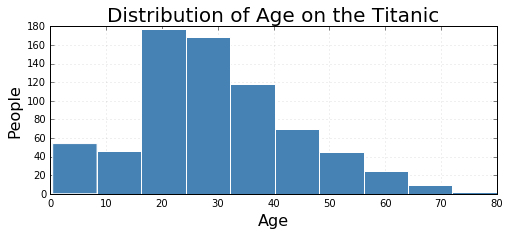

In [8]:
# Initialize figure subplots
fig, axes = plt.subplots(figsize=(8,3))
# --------------------------------------
dfTitanic.hist(column="Age", ax=axes, facecolor="steelblue", edgecolor="white")
                                                      
# Add titles and labels 
axes.set_title("Distribution of Age on the Titanic", fontsize=20)
axes.set_xlabel("Age", fontsize=16)
axes.set_ylabel("People", fontsize=16)

# Make grid lighter and set behind data
axes.grid(alpha=0.25)
axes.set_axisbelow(True)

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [9]:
femSurv = dfTitanic.loc[(dfTitanic["Sex"]=="female") & (dfTitanic["Survived"]==1)]
femNotSurv = dfTitanic.loc[(dfTitanic["Sex"]=="female") & (dfTitanic["Survived"]==0)]
print("Female survivor age mean: {}\nFemale survivor age median: {}\n"
      .format(femSurv["Age"].mean(), femSurv["Age"].median()))
print("Female non-survivor age mean: {}\nFemale non-survivor age median: {}\n"
      .format(femNotSurv["Age"].mean(), femNotSurv["Age"].median()))
print("The mean and median ages for females who survived were both higher than those who didn't.")

Female survivor age mean: 28.84771573604061
Female survivor age median: 28.0

Female non-survivor age mean: 25.046875
Female non-survivor age median: 24.5

The mean and median ages for females who survived were both higher than those who didn't.


**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

The data suggests male chivalry on a large part. Independent of class, female survival rate surpassed that of men's. The survival rate of first class men was lower than the survival rate of third class women so this strengthens my claim. I don't believe class warfare was a big characteristic in the final hours aboard the Titanic since the survival rate of first class females and second class females don't differ greatly. Third class passengers were at the bottom of the boat so I think they just had a harder time getting out.

### Problem 5
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [11]:
web_path = 'https://www.stat.berkeley.edu/~statlabs/data/babies.data'
dfB = pd.read_csv(web_path, delim_whitespace=True)
dfB.info()

URLError: <urlopen error Tunnel connection failed: 403 Forbidden>


**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristic.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [51]:
dfBabies = dfB[(dfB != 9).all(1) & (dfB != 99).all(1) & (dfB!=999).all(1)]

**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

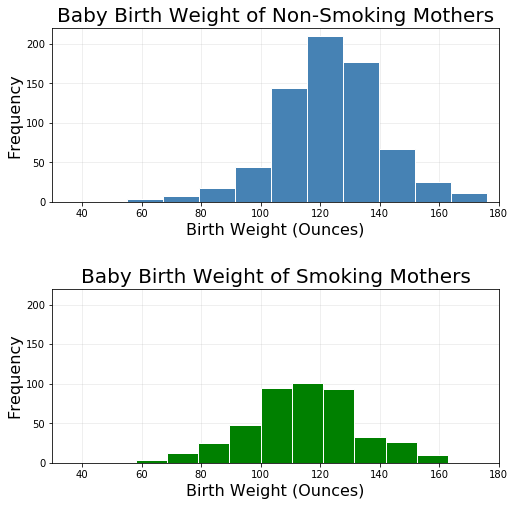

In [54]:
# Initialize figure subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

dfBabies.loc[dfBabies["smoke"]==0].hist(column="bwt", ax=axes[0], facecolor="steelblue", edgecolor="white")
                                                      
# Add titles and labels 
axes[0].set_title("Baby Birth Weight of Non-Smoking Mothers", fontsize=20)
axes[0].set_xlabel("Birth Weight (Ounces)", fontsize=16)
axes[0].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

dfBabies.loc[dfB["smoke"]==1].hist(column="bwt", ax=axes[1], facecolor="green", edgecolor="white")
                                                      
# Add titles and labels 
axes[1].set_title("Baby Birth Weight of Smoking Mothers", fontsize=20)
axes[1].set_xlabel("Birth Weight (Ounces)", fontsize=16)
axes[1].set_ylabel("Frequency", fontsize=16)

# Make grid lighter and set behind data
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

# --------------------------------------
# Make the plots comparable 
# --------------------------------------

# Set x and y axis limits to match
axes[0].set_xlim([30,180])
axes[1].set_xlim([30,180])
axes[0].set_ylim([0,220])
axes[1].set_ylim([0,220])

# Adjust vertical space so titles/axis labels don't overlap 
fig.subplots_adjust(hspace=.5)

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

We can see a positive skew on the baby birth weights for non-smoking mothers, whereas there appears to be a very slight negative skew for smoking mothers. The skew of smoking mothers is harder to discern. In both cases the distribution of baby birth weights is unimodal and highly clustered around the median.

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [56]:
smokerMean = dfBabies.loc[dfBabies["smoke"]==1]
nonSmokerMean = dfBabies.loc[dfBabies["smoke"]==0]
print("Baby Birth Weight Mean of Non-Smoking Mothers: {}\nBaby Birth Weight Median of Non-Smoking Mothers: {}\n"
     .format(nonSmokerMean["bwt"].mean(), nonSmokerMean["bwt"].median()))
print("Baby Birth Weight Mean of Smoking Mothers: {}\nBaby Birth Weight Median of Smoking Mothers: {}\n"
     .format(smokerMean["bwt"].mean(), smokerMean["bwt"].median()))

Baby Birth Weight Mean of Non-Smoking Mothers: 123.41784702549575
Baby Birth Weight Median of Non-Smoking Mothers: 124.0

Baby Birth Weight Mean of Smoking Mothers: 114.24663677130044
Baby Birth Weight Median of Smoking Mothers: 115.0



**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

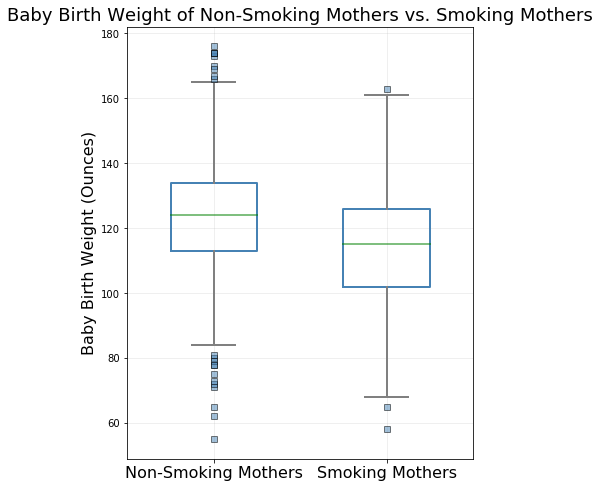

In [258]:
# Initialize figure 
fig, ax = plt.subplots(figsize=(6,8))

# To get just the columns corresponding to Gross and Ralston reservoirs, we 
# select only the rows of the DataFrame coresponding to those names, then 
# call boxplot and pass by="NAME" to break the data into the two sets 
bp = dfBabies.loc[(dfBabies["smoke"]==0) | (dfBabies["smoke"]==1)].boxplot(
    column=["bwt"], by="smoke", ax=ax, widths=[.5, .5], return_type="dict")

# This time, bp is a Pandas series containing multiple dictionaries
# corresponding to the two sets of data. We loop over each one individually 
# and set the parameters we want 
for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)

# Set title and vertical axis label
ax.set_title('Baby Birth Weight of Non-Smoking Mothers vs. Smoking Mothers', fontsize=18)
ax.set_ylabel("Baby Birth Weight (Ounces)", fontsize=16)

# Set names of plots
plt.xticks([1,2],["Non-Smoking Mothers", "Smoking Mothers"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

The skew of the baby birth weight of non-smoking mothers is difficult to distinguish from the box-and-whisker plots. However, we can observe that the data has a lot of fliers (outliers who lie outside the range of 1.5 \* Q).The skew of baby birth weight of smoking mothers is easier to see on these plots however, as we can confidently confirm a negative skew of data. There are few fliers as well, so the body weights of these babies is more clustered together. We can see that all Q1, Q2, and Q3 are higher for the non-smoking mother group than the smoking mother group.

### Problem 6: Cleaning Election Results Data  
***

The file 2014\_election\_results.csv contains data from congressional district races during the 2014 midterm elections.  The problem is that the data is **extremely dirty**.  Your goal in the problem will be to use Pandas to clean the election result data and then, if possible, determine the names of the winners in each congressional district as well as the vote percentage margin that they won by.  Remember that data cleaning and wrangling is a messy business.  Don't be afraid to roll your sleeves up and get hacky!   

**Part A**: Complete the clean_election_data( ) function to return a clean DataFrame that accomplishes the following: 

- remove rows in the DataFrame that are missing values in columns **STATE**, **DISTRICT**, and/or **GENERAL PERCENT**

<p> </p> 

- replace unknown names in **CANDIDATE NAME** with:  
    - the value from **CANDIDATE NAME (Last)**, if available
    - the string "UNKNOWN" if impossible to determine the full or last name 
    - **Note**: besides "NaN", data collectors appear to have used the string "Scattered" to indicate missing names as well
<p> </p> 
- convert the strings in **GENERAL PERCENT** to values of type float between $0$ and $100$ 
<p> </p> 
- restrict the DataFrame to only the columns **STATE**, **DISTRICT**, **CANDIDATE NAME**, **GENERAL PERCENT**

In [234]:
def clean_election_data():
    '''
    Function to clean election data 
    '''
    
    # read in dirty data 
    df = pd.read_csv("2014_election_results.csv")
    df = df.loc[df["STATE"].notnull()&df["D"].notnull()&df["GENERAL PERCENT"]]
    dfClean = df
    for candidate_index, candidate in df.iterrows():
        fullName = dfClean.loc[candidate_index, "CANDIDATE NAME"]
        lastName = dfClean.loc[candidate_index, "CANDIDATE NAME (Last)"]
        dfClean.loc[candidate_index, "CANDIDATE NAME"] = "UNKNOWN" if pd.isnull(fullName) or "Scattered" in fullName else fullName
        fullName = dfClean.loc[candidate_index, "CANDIDATE NAME"]
        dfClean.loc[candidate_index, "CANDIDATE NAME"] = lastName if fullName=="UNKNOWN" and pd.notnull(lastName) and "Scattered" not in lastName else dfClean.loc[candidate_index, "CANDIDATE NAME"]
    dfClean["GENERAL PERCENT"] = dfClean["GENERAL PERCENT"].map(lambda x: str(x)[:-1])
    dfClean["GENERAL PERCENT"] = pd.to_numeric(dfClean["GENERAL PERCENT"].str.replace(',','.'))
    dfClean = dfClean[["STATE", "D", "CANDIDATE NAME", "GENERAL PERCENT"]]
    return dfClean


**Part B**: Complete the function winners_and_margins( ) that takes in your clean DataFrame from **Part A** and returns a DataFrame with one row per state-district pair and with columns **STATE**, **D**, **WINNER**, and **MARGIN** where

- **STATE** and **D** are as defined in the original DataFrame 
<p> </p> 
- **WINNER** is the name of the candidate that had the largest general vote percentage (which may possibly be "UNKNOWN")
<p> </p> 
- **MARGIN** is the difference between the winning general vote percentage and the second highest vote percentage.  If there is only one candidate in a particular district you should list the general vote percentage obtained by the sole candidate. 

<p> </p> 

Finally, your DataFrame should be **sorted from most contentious races to least contentious** (i.e. from smallest winning margin to the largest). 

In [235]:
def winners_and_margins(df):
    d = []
    for name, group in df.groupby(["STATE","D"]):
        sortedGroup = group.sort_values(ascending=False, by="GENERAL PERCENT")
        max1 = sortedGroup["GENERAL PERCENT"].iloc[0]
        max2 = sortedGroup["GENERAL PERCENT"].iloc[1] if sortedGroup["GENERAL PERCENT"].count() > 1 else 0
        d.append({"STATE":name[0],"D":name[1],"WINNER":sortedGroup["CANDIDATE NAME"].iloc[0],"MARGIN":max1-max2})        
    dfNew = pd.DataFrame(d)
    dfNew = dfNew.sort_values(ascending=True, by="MARGIN")
    return dfNew
winners_and_margins(clean_election_data())

,D,MARGIN,STATE,WINNER
117,14,100.00,Georgia,"Graves, John Thomas ""Tom"""
119,3,100.00,Georgia,"Westmoreland, Lynn Acton"
116,13,100.00,Georgia,Scott
334,18,100.00,Pennsylvania,"Murphy, Tim"
114,11,100.00,Georgia,"Loudermilk, Barry D."
331,15,100.00,Pennsylvania,Dent
330,14,100.00,Pennsylvania,"Doyle, Mike"
121,5,100.00,Georgia,"Lewis, John R."
313,7,100.00,Ohio,"Gibbs, Bob"
393,4,100.00,Texas,"Ratcliffe, John"


### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_, authors Darrell Huff and Irving Geis describe some common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. **If you come up with something that you're proud of then please post it to Piazza!**